# Composite Beam Example

## Setup

Add directories containing the st7py package and the St7API module (shipped with Strand7 and also included in lib/).


In [1]:
import sys
import numpy as np

sys.path.append("../.")
sys.path.append("../lib")


## Initialize API 

Import the st7py package and call the start function to initialize the St7API.

In [2]:
import st7py as st7

# load api
st7.start() 


St7API initialized


## Model

Use instance of the Model class to open the Strand7 model file.

In [3]:
# create instance of model  
model = st7.Model(filename='../models/beam_composite.st7', 
                  scratch='C:\Temp', 
                  uid=1)

model.open()


Interact with the model...



In [4]:
# get element totals
totals = model.totals(disp=True)

Element totals:
		Nodes: 1333
		Beams: 132
		Plates: 1056
		Bricks: 0


## NFA Solver



In [5]:
nfa = st7.NFA(uid = 1,
             filename = '../models/beam_composite.NFA',
             logname = '../models/beam_composite.NFL',
             fcase = 1,
             nsm = (1,),
             nmodes = 4)

nfa.run(disp=True)


NFA run finished (uid: 1)


### Get Frequencies



In [6]:
freqs = nfa.getFrequencies(disp=True)

Mode 1    Frequency: 4.688264508471357 Hz
Mode 2    Frequency: 7.201602906205432 Hz
Mode 3    Frequency: 16.67565035865051 Hz
Mode 4    Frequency: 21.257994329482404 Hz


### Get Mode Shapes



In [7]:
shapes = nfa.getModeShapes(nodes=np.arange(1,totals['Nodes']+1))

# index first mode
u1 = shapes[:,:,0]
u1.shape

(1333, 6)

## Macros


### Nodal Coordinates



In [21]:
# single node
coord = st7.macros.get_coord(1,1)

# all the nodes via list comprehension
coords = [st7.macros.get_coord(1, node) for node in range(1, totals['Nodes']+1)]

# note that we'll still need to convert to a numpy array for useful slicing
coords = np.array(coords)

### Plot Nodal Coordinates

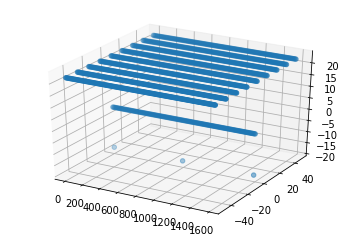

In [52]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(coords[:,0], coords[:,1], coords[:,2])

# this is a hard set of equal axis (for z dim too, looks weird)
#plt.gca().set_aspect('equal', adjustable='box')

plt.show()



## Plot Mode Shapes


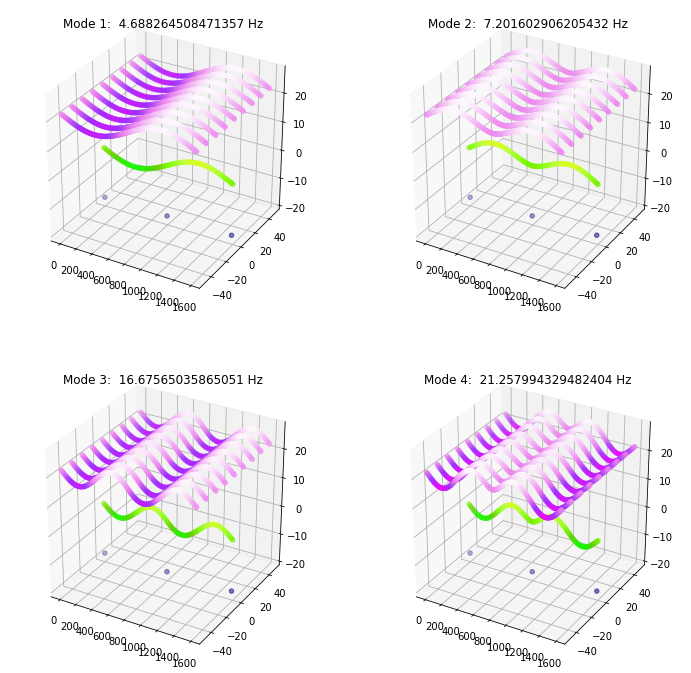

In [84]:
# import colormaps
import matplotlib.cm as cm


# mode shape displacement scale
scale = 50


fig = plt.figure(figsize=(12,12))


for mode in np.arange(4):
    
    ax = fig.add_subplot(2,2,mode+1, projection='3d')
    
    # 3d scatter of superimposed modal nodal displacements
    #  colormapped to Z-dir
    ax.scatter(coords[:,0]+shapes[:,0,mode] * scale, 
               coords[:,1]+shapes[:,1,mode] * scale, 
               coords[:,2]+shapes[:,2,mode] * scale,
               c=coords[:,2]+shapes[:,2,mode]*scale,
               cmap = cm.gist_ncar)
    
    plt.title('Mode {}:  {} Hz'.format(mode+1, freqs[mode]))
    
    
plt.show()



## Close Model and Unload API

In [85]:
model.close()
st7.stop()

St7API released
